# Pymaceuticals Inc.
---

### Analysis

- From the analysis performed below we see that the capomulin drug trial had the greatest affect on tumor size out of the four regimes we compared (Capomulin, Ramicane, Infubinol, and Ceftamin).
- Specifically we can see in the treament of mouse l509 we can see a significant decrease in tumor size over the course of 45 days.
- Analysing the data for any errors we see that there is an even split between male and female mice and that the number of mice tested for each trial was roughly the same. Meaning the data has a large enough sample size to be valid.
- Lastly, the average size of a test mouse and its average tumor volume throughout the experiment was found to have a strong positive correlation. This would imply that the larger the test mouse the more likely that it's tumor is larger as well.

In [1]:
%matplotlib notebook

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files pathways
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
complete_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the total number of unique test mice.
complete_df['Mouse ID'].nunique()


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Using code from stack overflow (https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python)
complete_df[complete_df.duplicated(keep=False)]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.0,0,Propriva,Female,21,26
861,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse_ID_g989 = complete_df.loc[complete_df['Mouse ID'] == 'g989',:]
Mouse_ID_g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_ID_Cleaned_df = complete_df.loc[complete_df['Mouse ID'] != 'g989',:]


In [7]:
# Checking the number of mice in the clean DataFrame.
# In other words check if mouse 'g989' has been dropped
Mouse_ID_Cleaned_df['Mouse ID'].nunique()


248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Using groupby to group the drug regimens and the tumor volume by the above statisitcs
Mean_tumor_volume = Mouse_ID_Cleaned_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median_tumor_volume = Mouse_ID_Cleaned_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Variance_tumor_volume = Mouse_ID_Cleaned_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Std_tumor_volume = Mouse_ID_Cleaned_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
Std_err_tumor_volume = Mouse_ID_Cleaned_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary DataFrame.
Summary_stats_tumor_vol = pd.DataFrame({
    "Mean Tumor Volume" : Mean_tumor_volume,
    "Median Tumor Volume" : Median_tumor_volume,
    "Tumor Volume Variance" : Variance_tumor_volume,
    "Tumor Volume Std. Dev." : Std_tumor_volume,
    "Tumor Volume Std. Err." : Std_err_tumor_volume
})

#print
Summary_stats_tumor_vol


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


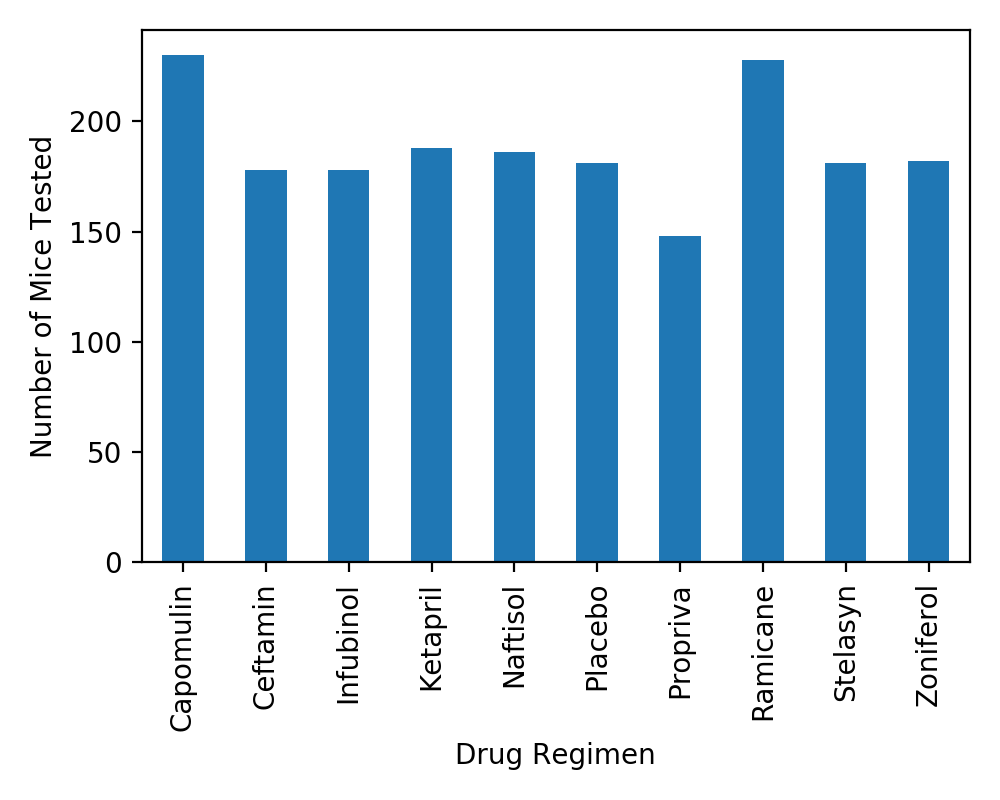

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Resize the figure
plt.figure(figsize=(5,4))

# Split up our data into groups based upon 'Drug Regimen'
Mouse_ID_Cleaned_df_grouped = Mouse_ID_Cleaned_df.groupby(['Drug Regimen'])

# Find out how many of each Timepoint there is per Regimen type
num_of_timepoints = Mouse_ID_Cleaned_df_grouped['Timepoint'].count()

# Chart our data, give it a title, and label the axis'
patron_chart = num_of_timepoints.plot(kind="bar")
patron_chart.set_xlabel("Drug Regimen")
patron_chart.set_ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


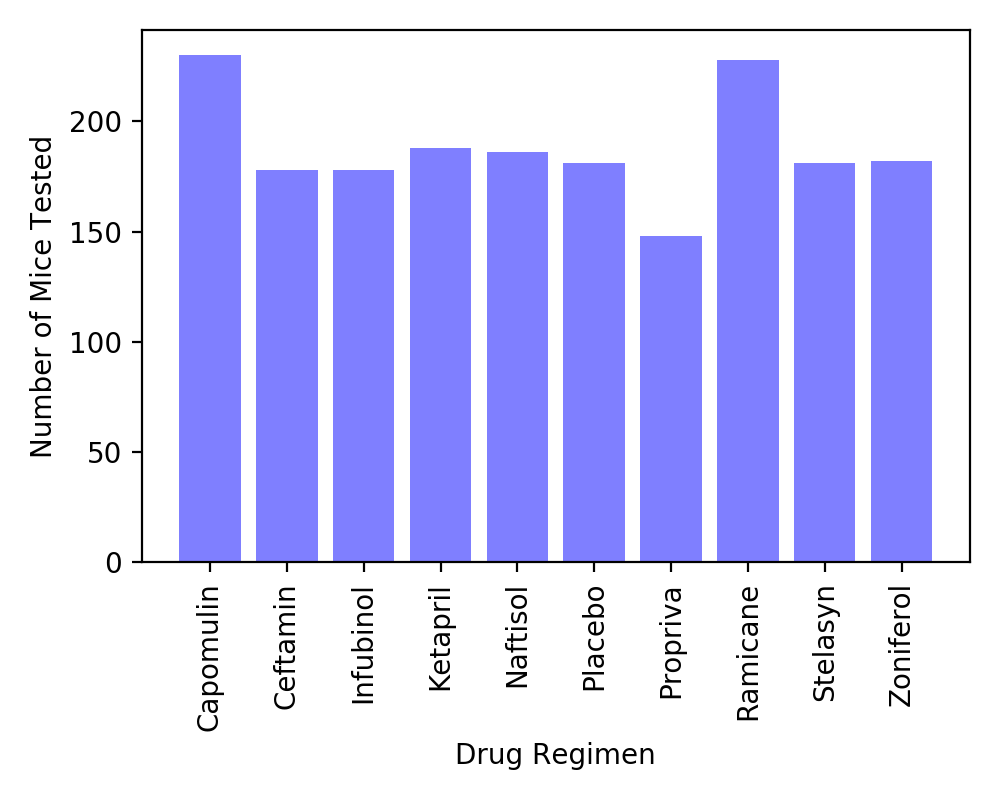

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Reset the index of the two column data frame we created above. This df has the columns "Timepoint" and "Drug Regimen" only.
num_of_timepoints_reset = num_of_timepoints.reset_index()

# Adjust plot size
plt.figure(figsize=(5,4))

# collect the string values from the df
x_axis = np.arange(len(num_of_timepoints_reset))

#match the tick location to the x-axis
tick_locations = [value for value in x_axis]

#Using pyplot to create a chart similar to the one above
plt.bar(x_axis, num_of_timepoints_reset['Timepoint'] , color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, num_of_timepoints_reset['Drug Regimen'], rotation="vertical")

# Label the plot
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()


In [11]:
# group by Sex of the mice and count total
Mouse_ID_Cleaned_df_grouped_by_gender = Mouse_ID_Cleaned_df.groupby(['Sex']).count()
Mouse_ID_Cleaned_df_grouped_by_gender_ID = Mouse_ID_Cleaned_df_grouped_by_gender['Mouse ID']

Mouse_ID_Cleaned_df_grouped_by_gender_reset = Mouse_ID_Cleaned_df_grouped_by_gender.reset_index()

#Mouse_ID_Cleaned_df_grouped_by_gender_reset.rename(columns = {'Mouse ID':'Sex'})
Mouse_ID_Cleaned_df_grouped_by_gender_ID


Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


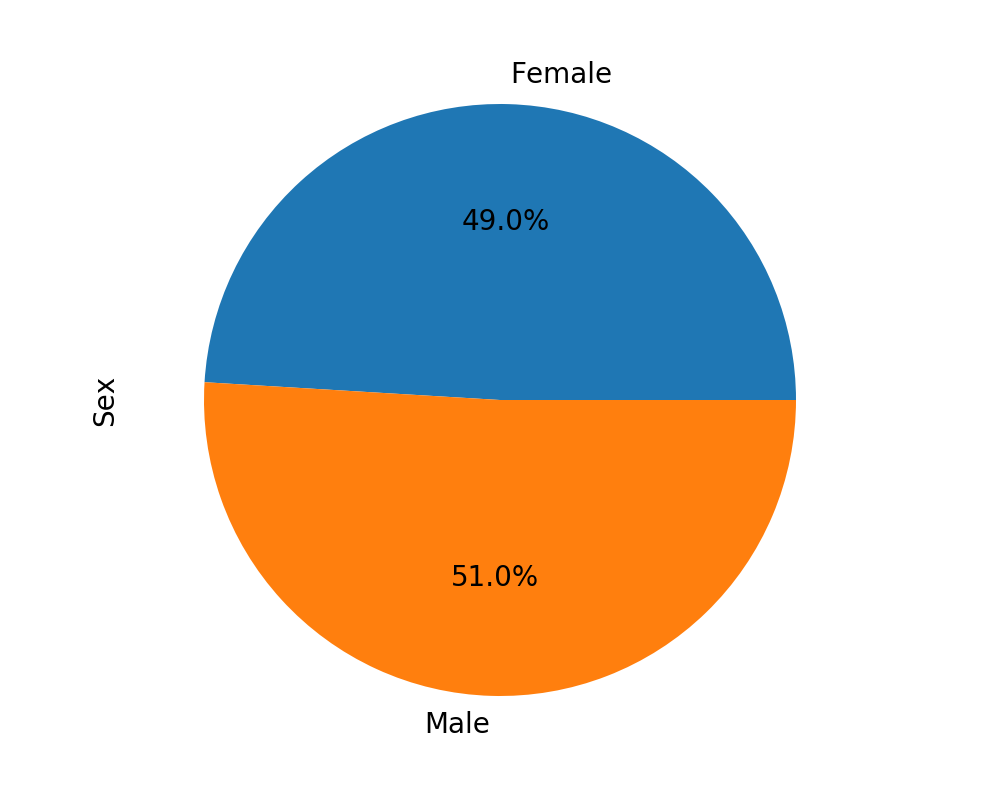

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure(figsize=(5,4))
# Chart our data, give it a title, and label the axes
patron_chart = Mouse_ID_Cleaned_df_grouped_by_gender_ID.plot(kind="pie",autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


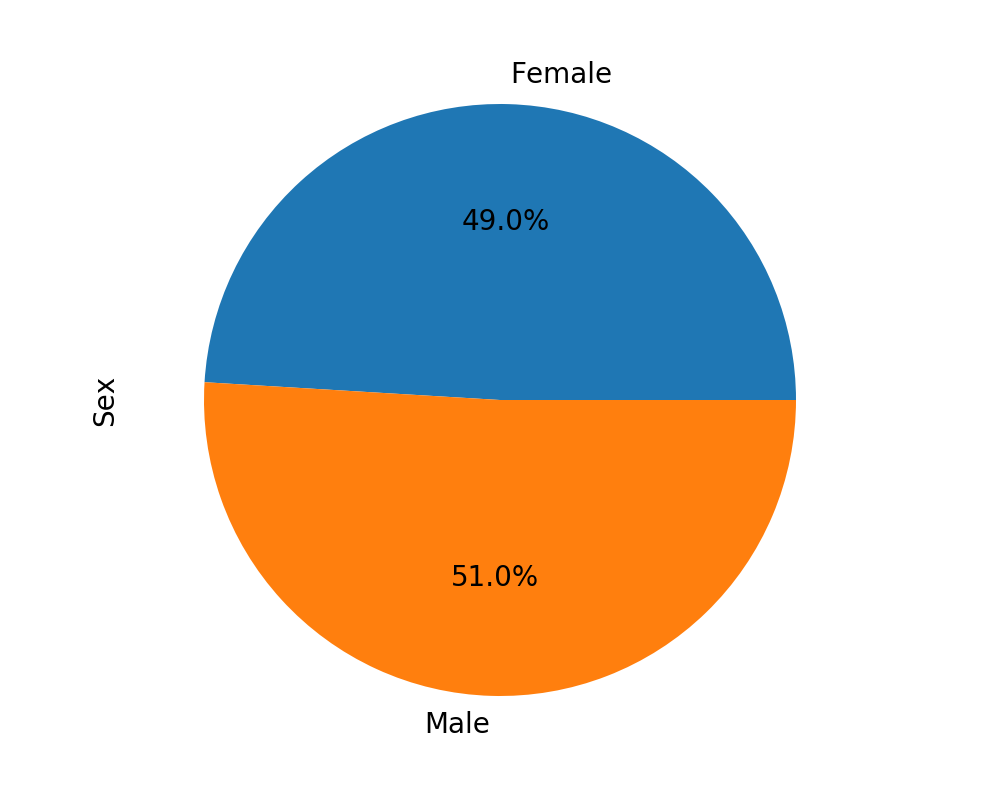

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create labels
Gender = ["Female", "Male"]
plt.figure(figsize=(5,4))
# Tell matplotlib to create a pie chart based upon the above data (Use mouse ID for the total count of males vs females)
plt.pie(Mouse_ID_Cleaned_df_grouped_by_gender['Mouse ID'], labels=Gender,
        autopct="%1.1f%%")
# Create axes which are equal so we have a perfect circle
plt.ylabel("Sex")
# Save an image of our chart and print the final product to the screen
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Last_time_point_df = Mouse_ID_Cleaned_df.groupby(['Mouse ID']).max()['Timepoint']
Last_time_point_df_reset = Last_time_point_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Last_time_point_Cleaned_merge = pd.merge(Mouse_ID_Cleaned_df,Last_time_point_df,how="inner", on = ['Timepoint','Mouse ID'])
Last_time_point_Cleaned_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [31]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

#lists to hold quartiles
lowerq = []
upperq = []
iqr = []
upperbound = []
lowerbound = []

#initialize list to hold regime values
Current_Regime_Values = []
i = 0

df_boxplot = pd.DataFrame()

for regime in treatment_names:
    
    #Create a mask using "regime" to select values from rows only with the current regime
    mask_regime = (regime == Last_time_point_Cleaned_merge['Drug Regimen'])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes (for plotting)
    Current_Regime_Values = (Last_time_point_Cleaned_merge.loc[mask_regime,('Tumor Volume (mm3)')])    
    
    #___________________________________________________________________________________________________
    
    # Run through each regime and collect its lowerbound, 1st quartile, 4th quartile, IQR and upperbound
    quartiles = Last_time_point_Cleaned_merge.loc[regime == Last_time_point_Cleaned_merge['Drug Regimen'],'Tumor Volume (mm3)'].quantile([.25,.5,.75])
    #Get the 1st and 4th quartiles
    lowerq.append(quartiles[0.25])
    upperq.append(quartiles[0.75])
    #IQR = fourth_qrt - first_qrt
    iqr.append(quartiles[0.75]-quartiles[0.25])
    lowerbound.append(quartiles[0.25] - (1.5*(quartiles[0.75]-quartiles[0.25])))
    upperbound.append(quartiles[0.75] + (1.5*(quartiles[0.75]-quartiles[0.25])))
    
    #___________________________________________________________________________________________________
    
    # add subset (note the data pulled from the df "Last_time_point_Cleaned_merge" does NOT comes as a list for some reason
    # The simple fix is to change the data to type list as we see below
    df_boxplot[regime] = list(Current_Regime_Values)
    
    # Determine outliers using upper and lower bounds
    print(f'The outliers for {regime} are as follows: ')
    for item in Current_Regime_Values:
        if item > upperbound[i] or item < lowerbound[i]:
            print(f'{item}, ')
    # Add one to i to move down the lists above when a new value is appended
    i = i + 1
    
#___________________________________________________________________________    
    
# reset i so this will work if it is ran more than once by the user
i = 0



The outliers for Capomulin are as follows: 
The outliers for Ramicane are as follows: 
The outliers for Infubinol are as follows: 
36.321345799999996, 
The outliers for Ceftamin are as follows: 


In [29]:
# Save the quartile data in a data frame for easier readability if needed
regime_df = pd.DataFrame ({
    'Regime' : treatment_names,
    'Lower_bound' : lowerbound,
    'Q1' : lowerq,
    'IQR' : iqr,
    'Q3' : upperq,
    'Upper_bound' : upperbound
})
regime_df

,Regime,Lower_bound,Q1,IQR,Q3,Upper_bound
0,Capomulin,20.704562,32.377357,7.781863,40.159220,51.832015
1,Ramicane,17.912664,31.560470,9.098537,40.659006,54.306811
2,Infubinol,36.832905,54.048608,11.477135,65.525743,82.741446
3,Ceftamin,25.355450,48.722078,15.577752,64.299830,87.666458


<IPython.core.display.Javascript object>


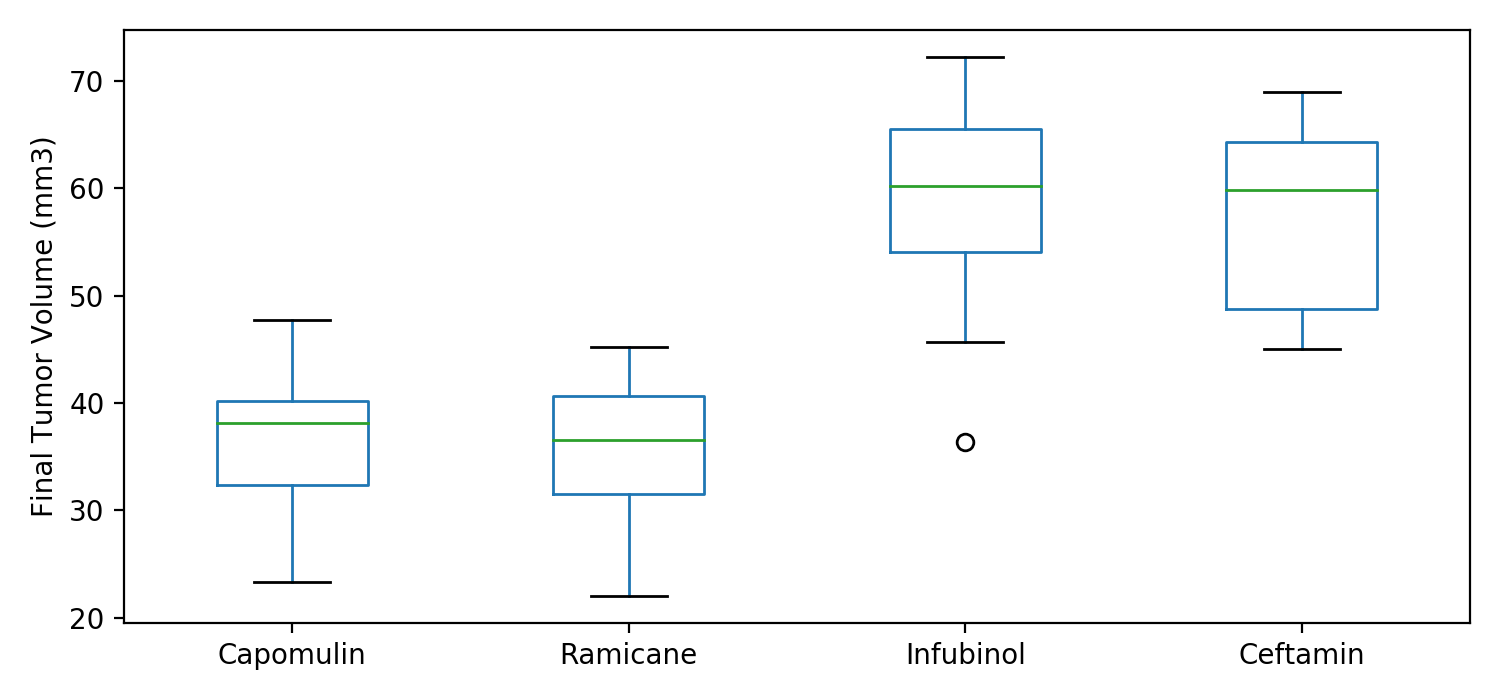

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe as a multibox boxplot
ax = df_boxplot[treatment_names].plot(kind='box')
# Label the y-axis
plt.ylabel("Final Tumor Volume (mm3)")
# Display the plot
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


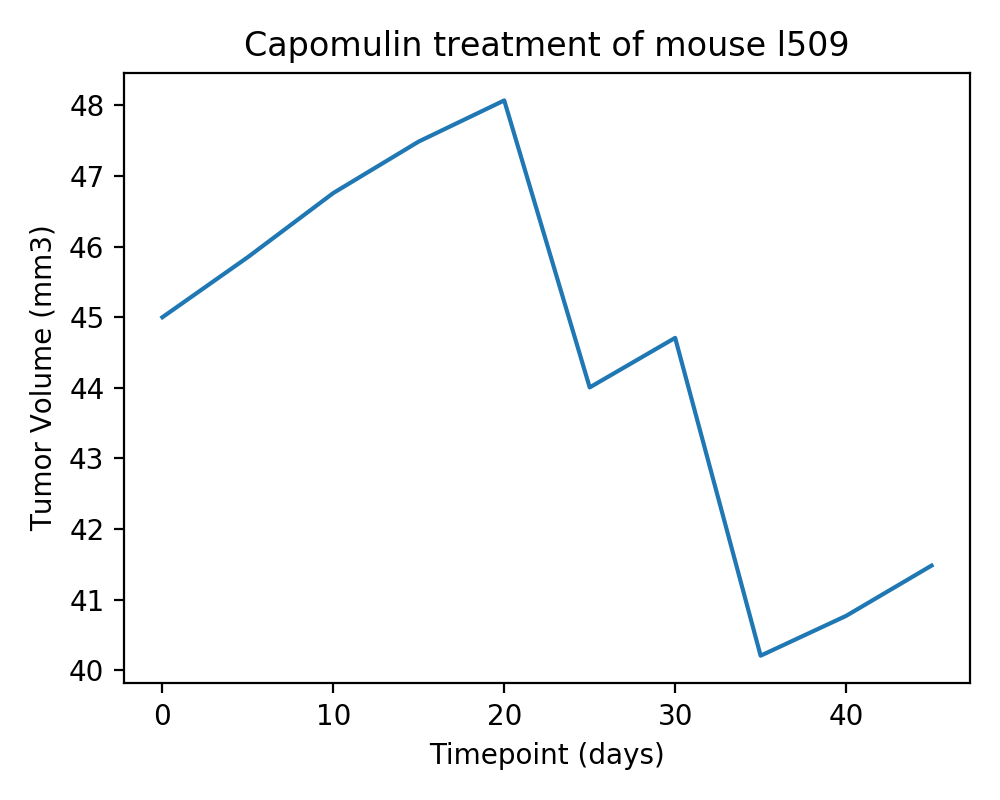

In [90]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create a mask to pull out mouse ID "l509" from the data frame
mask_l509 = ('l509' == Mouse_ID_Cleaned_df['Mouse ID'])
Mouse_l509 = Mouse_ID_Cleaned_df.loc[mask_l509,('Mouse ID','Tumor Volume (mm3)','Timepoint')]

# Set figure size
plt.figure(figsize=(5,4))

#Labels and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin treatment of mouse l509')

# plot x = Timepoint and y = Tumor Volume (mm3)
plt.plot(Mouse_l509['Timepoint'], Mouse_l509['Tumor Volume (mm3)'])
plt.show()


In [68]:
Capomulin_regimen_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0.0,45.000000,0.0,Capomulin,Female,9.0,22.0
1,b128,5.0,45.651331,0.0,Capomulin,Female,9.0,22.0
2,b128,10.0,43.270852,0.0,Capomulin,Female,9.0,22.0
3,b128,15.0,43.784893,0.0,Capomulin,Female,9.0,22.0
4,b128,20.0,42.731552,0.0,Capomulin,Female,9.0,22.0
...,...,...,...,...,...,...,...,...
1900,v923,NaN,41.581595,NaN,NaN,NaN,NaN,NaN
1901,w150,NaN,41.384825,NaN,NaN,NaN,NaN,NaN
1902,w914,NaN,41.352452,NaN,NaN,NaN,NaN,NaN
1903,x401,NaN,36.182040,NaN,NaN,NaN,NaN,NaN


In [83]:
Capomulin_regimen_merge

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,41.963636
1,b128,5,45.651331,0,Capomulin,Female,9,22,41.963636
2,b128,10,43.270852,0,Capomulin,Female,9,22,41.963636
3,b128,15,43.784893,0,Capomulin,Female,9,22,41.963636
4,b128,20,42.731552,0,Capomulin,Female,9,22,41.963636
...,...,...,...,...,...,...,...,...,...
225,m601,25,33.118756,1,Capomulin,Male,22,17,34.847470
226,m601,30,31.758275,1,Capomulin,Male,22,17,34.847470
227,m601,35,30.834357,1,Capomulin,Male,22,17,34.847470
228,m601,40,31.378045,1,Capomulin,Male,22,17,34.847470


In [89]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a mask to pull the weight, ID, tumor vol, and trial type from the merged data frame
# The task is to specifically pull the regime "Capomulin" so those are the rows we want to isolate.
mask_capomulin = ('Capomulin' == Mouse_ID_Cleaned_df['Drug Regimen'])
# Pull only the mouse ID's that were involved in the capomulin trials
Capomulin_regimen = Mouse_ID_Cleaned_df.loc[mask_capomulin,('Mouse ID','Tumor Volume (mm3)','Weight (g)','Drug Regimen')]

#Get the average of both the weight and tumor volume of each mouse ID
Capomulin_regimen_average_vol = Capomulin_regimen.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
Capomulin_regimen_average_weight = Capomulin_regimen.groupby(['Mouse ID']).mean()['Weight (g)']

# Reset the index for both data frames
Capomulin_regimen_average_vol_reset= Capomulin_regimen_average_vol.reset_index()
Capomulin_regimen_average_weight_reset= Capomulin_regimen_average_weight.reset_index()

# Merge the two data frames to get the df we will be using for the scatter plots below
Capomulin_regimen_merge = pd.merge(Capomulin_regimen_average_vol_reset,Capomulin_regimen_average_weight_reset,how="left", on = ['Mouse ID'])
Capomulin_regimen_merge.head()


,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22


<IPython.core.display.Javascript object>


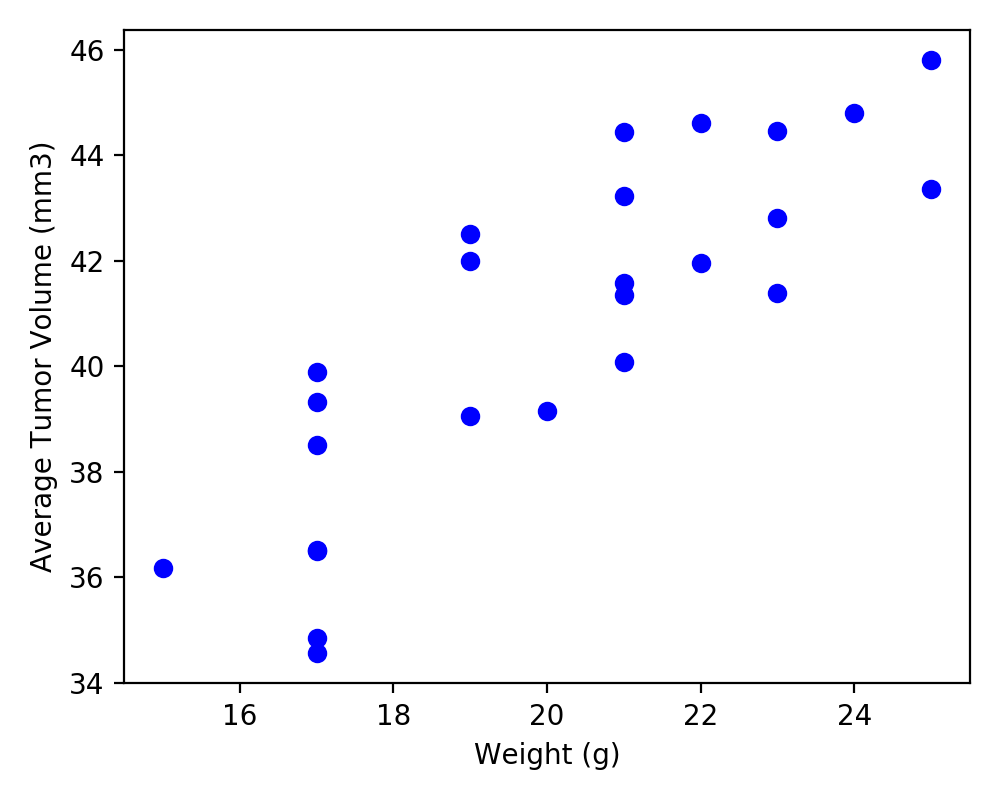

In [87]:
# Plot a scatter plot using the above data frame

# Create lists to hold x = Weight (g) and y = Tumor Volume (mm3)
x_values = Capomulin_regimen_merge['Weight (g)']
y_values = Capomulin_regimen_merge['Tumor Volume (mm3)']

plt.figure(figsize=(5,4))
# Create a simple scatter plot and label the axis.
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="blue")

# Labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


<IPython.core.display.Javascript object>


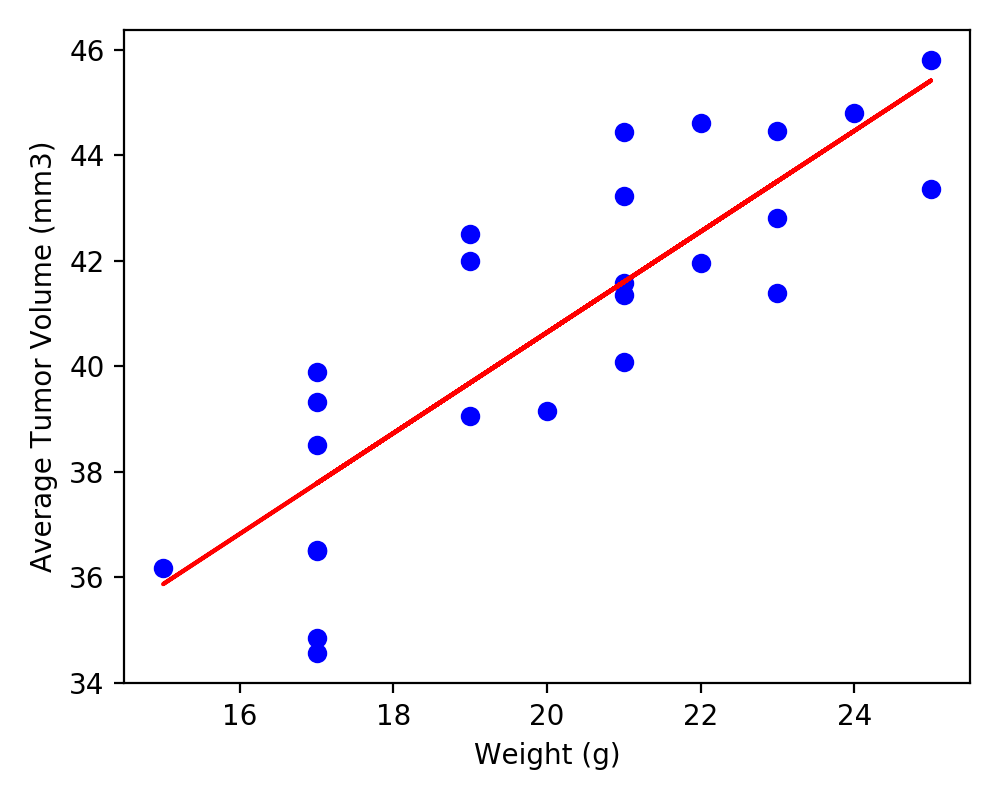

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# the below values from the x and y values used in the last graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

rvalue = round(rvalue,2)

print(f'The correlation between mouse weight and the average tumor volume is {rvalue}')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept

plt.figure(figsize=(5,4))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="blue")

plt.plot(x_values,regress_values,"r-")


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

